In [5]:
import pickle
from neuron_visualization.NeuronVisualizer import NeuronVisualizer
import pandas as pd

env_type = "square"

with open(f"models/rnn_{env_type[0:2]}_model.pkl", "rb") as f:
    model = pickle.load(f)
model.set_device("cpu")
visualizer = NeuronVisualizer(model)
data = pd.read_csv(f"data/{env_type}_1000traj_50steps.csv")
visualizer.retrieve_activations(data, use_predicted=True)

100%|██████████| 1000/1000 [00:07<00:00, 135.20it/s]


100%|██████████| 100/100 [00:01<00:00, 63.70it/s]


Cluster 0: [13 14 15 20 25 29 32 34 45 51 56 57 62 66 72 79 86 99]


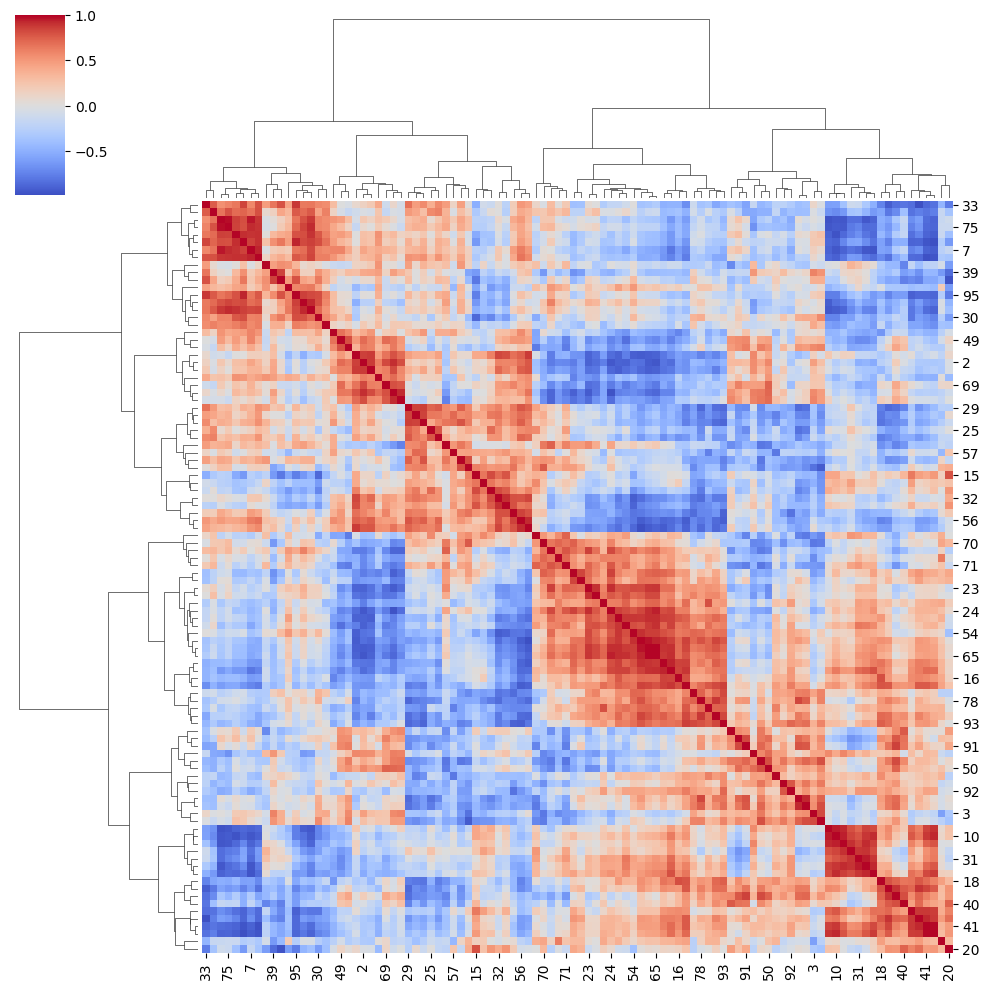

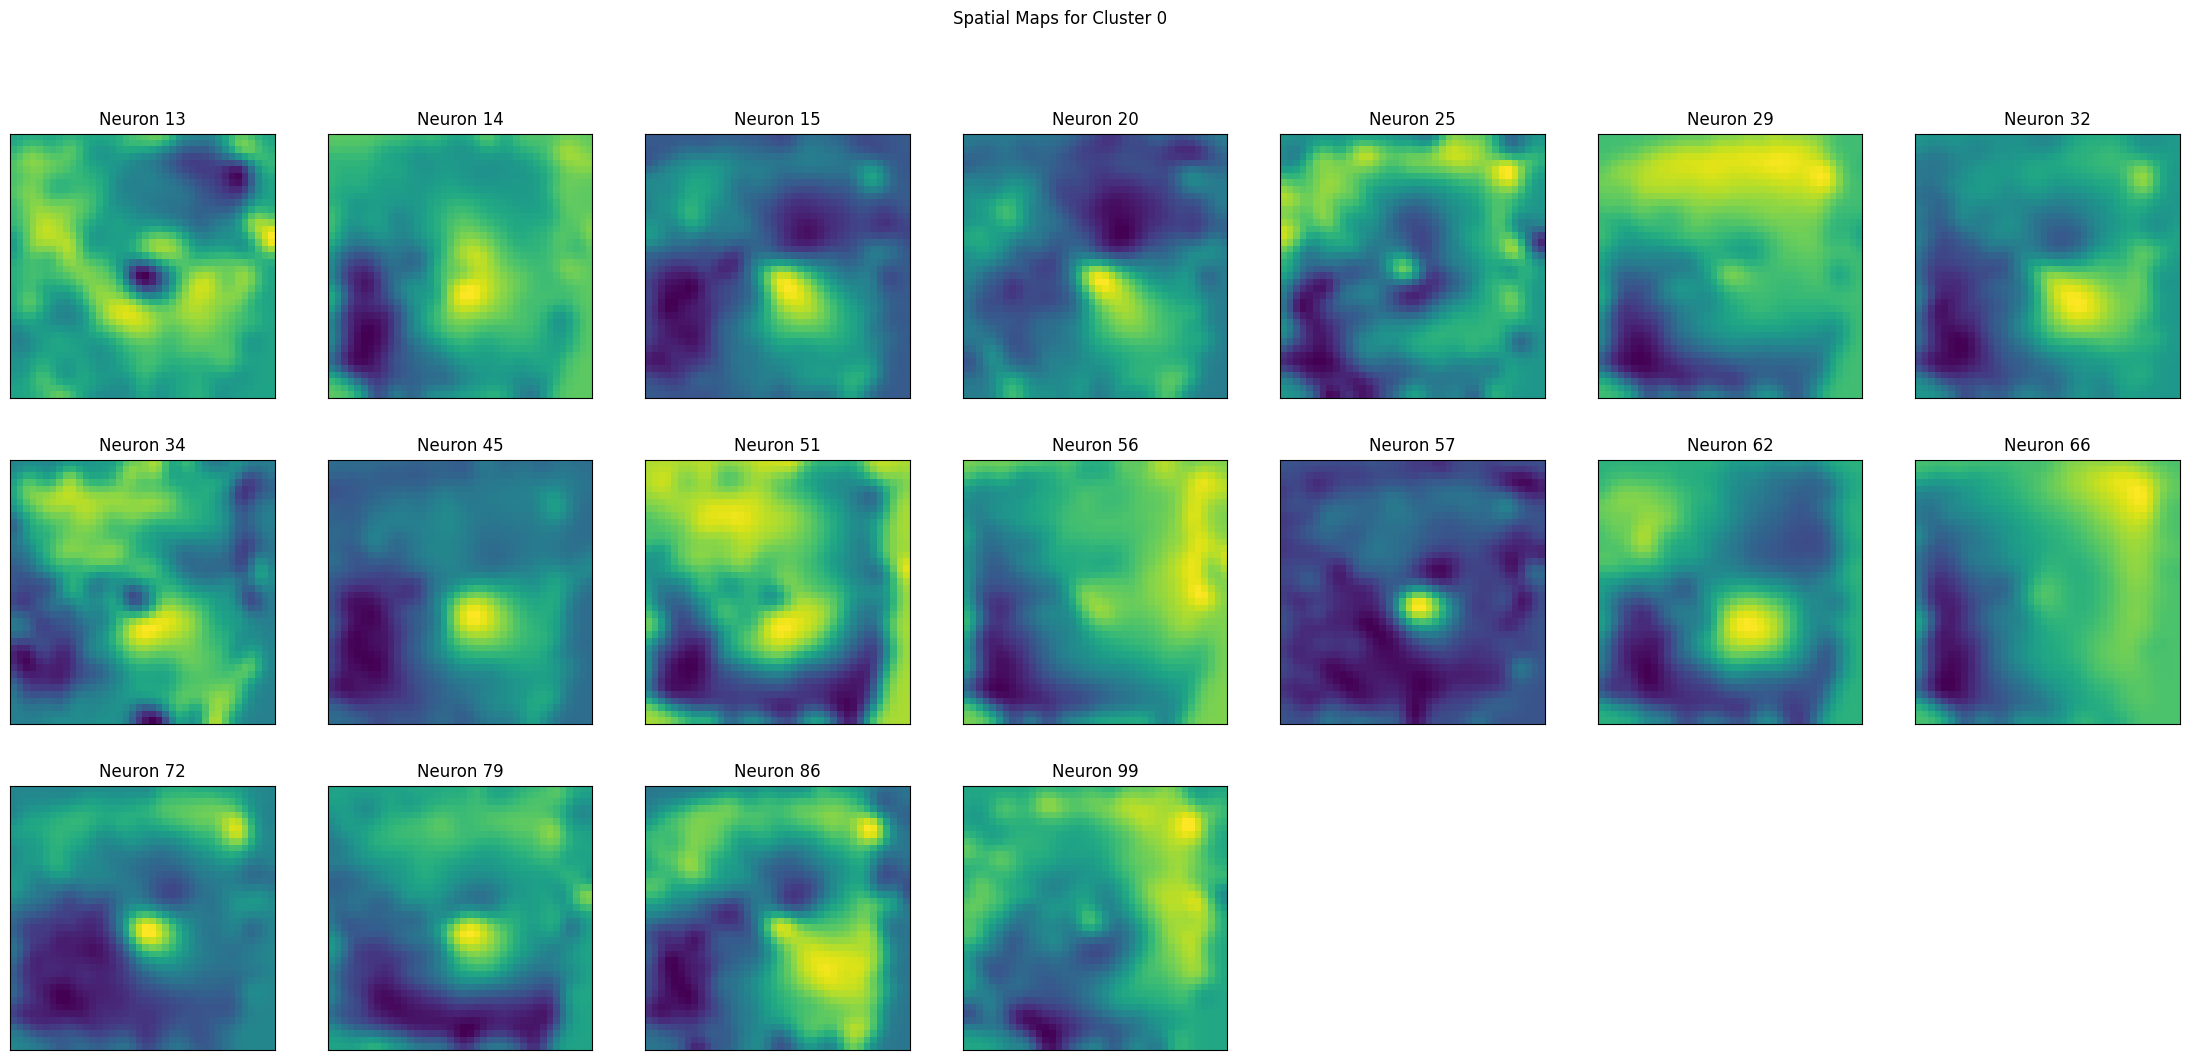

Cluster 1: [ 0  1  4  9 10 12 16 18 19 21 23 24 28 31 36 40 41 53 54 55 58 64 65 68
 74 76 77 78 80 81 84 87 88 89 90 92 93 94 96 97 98]


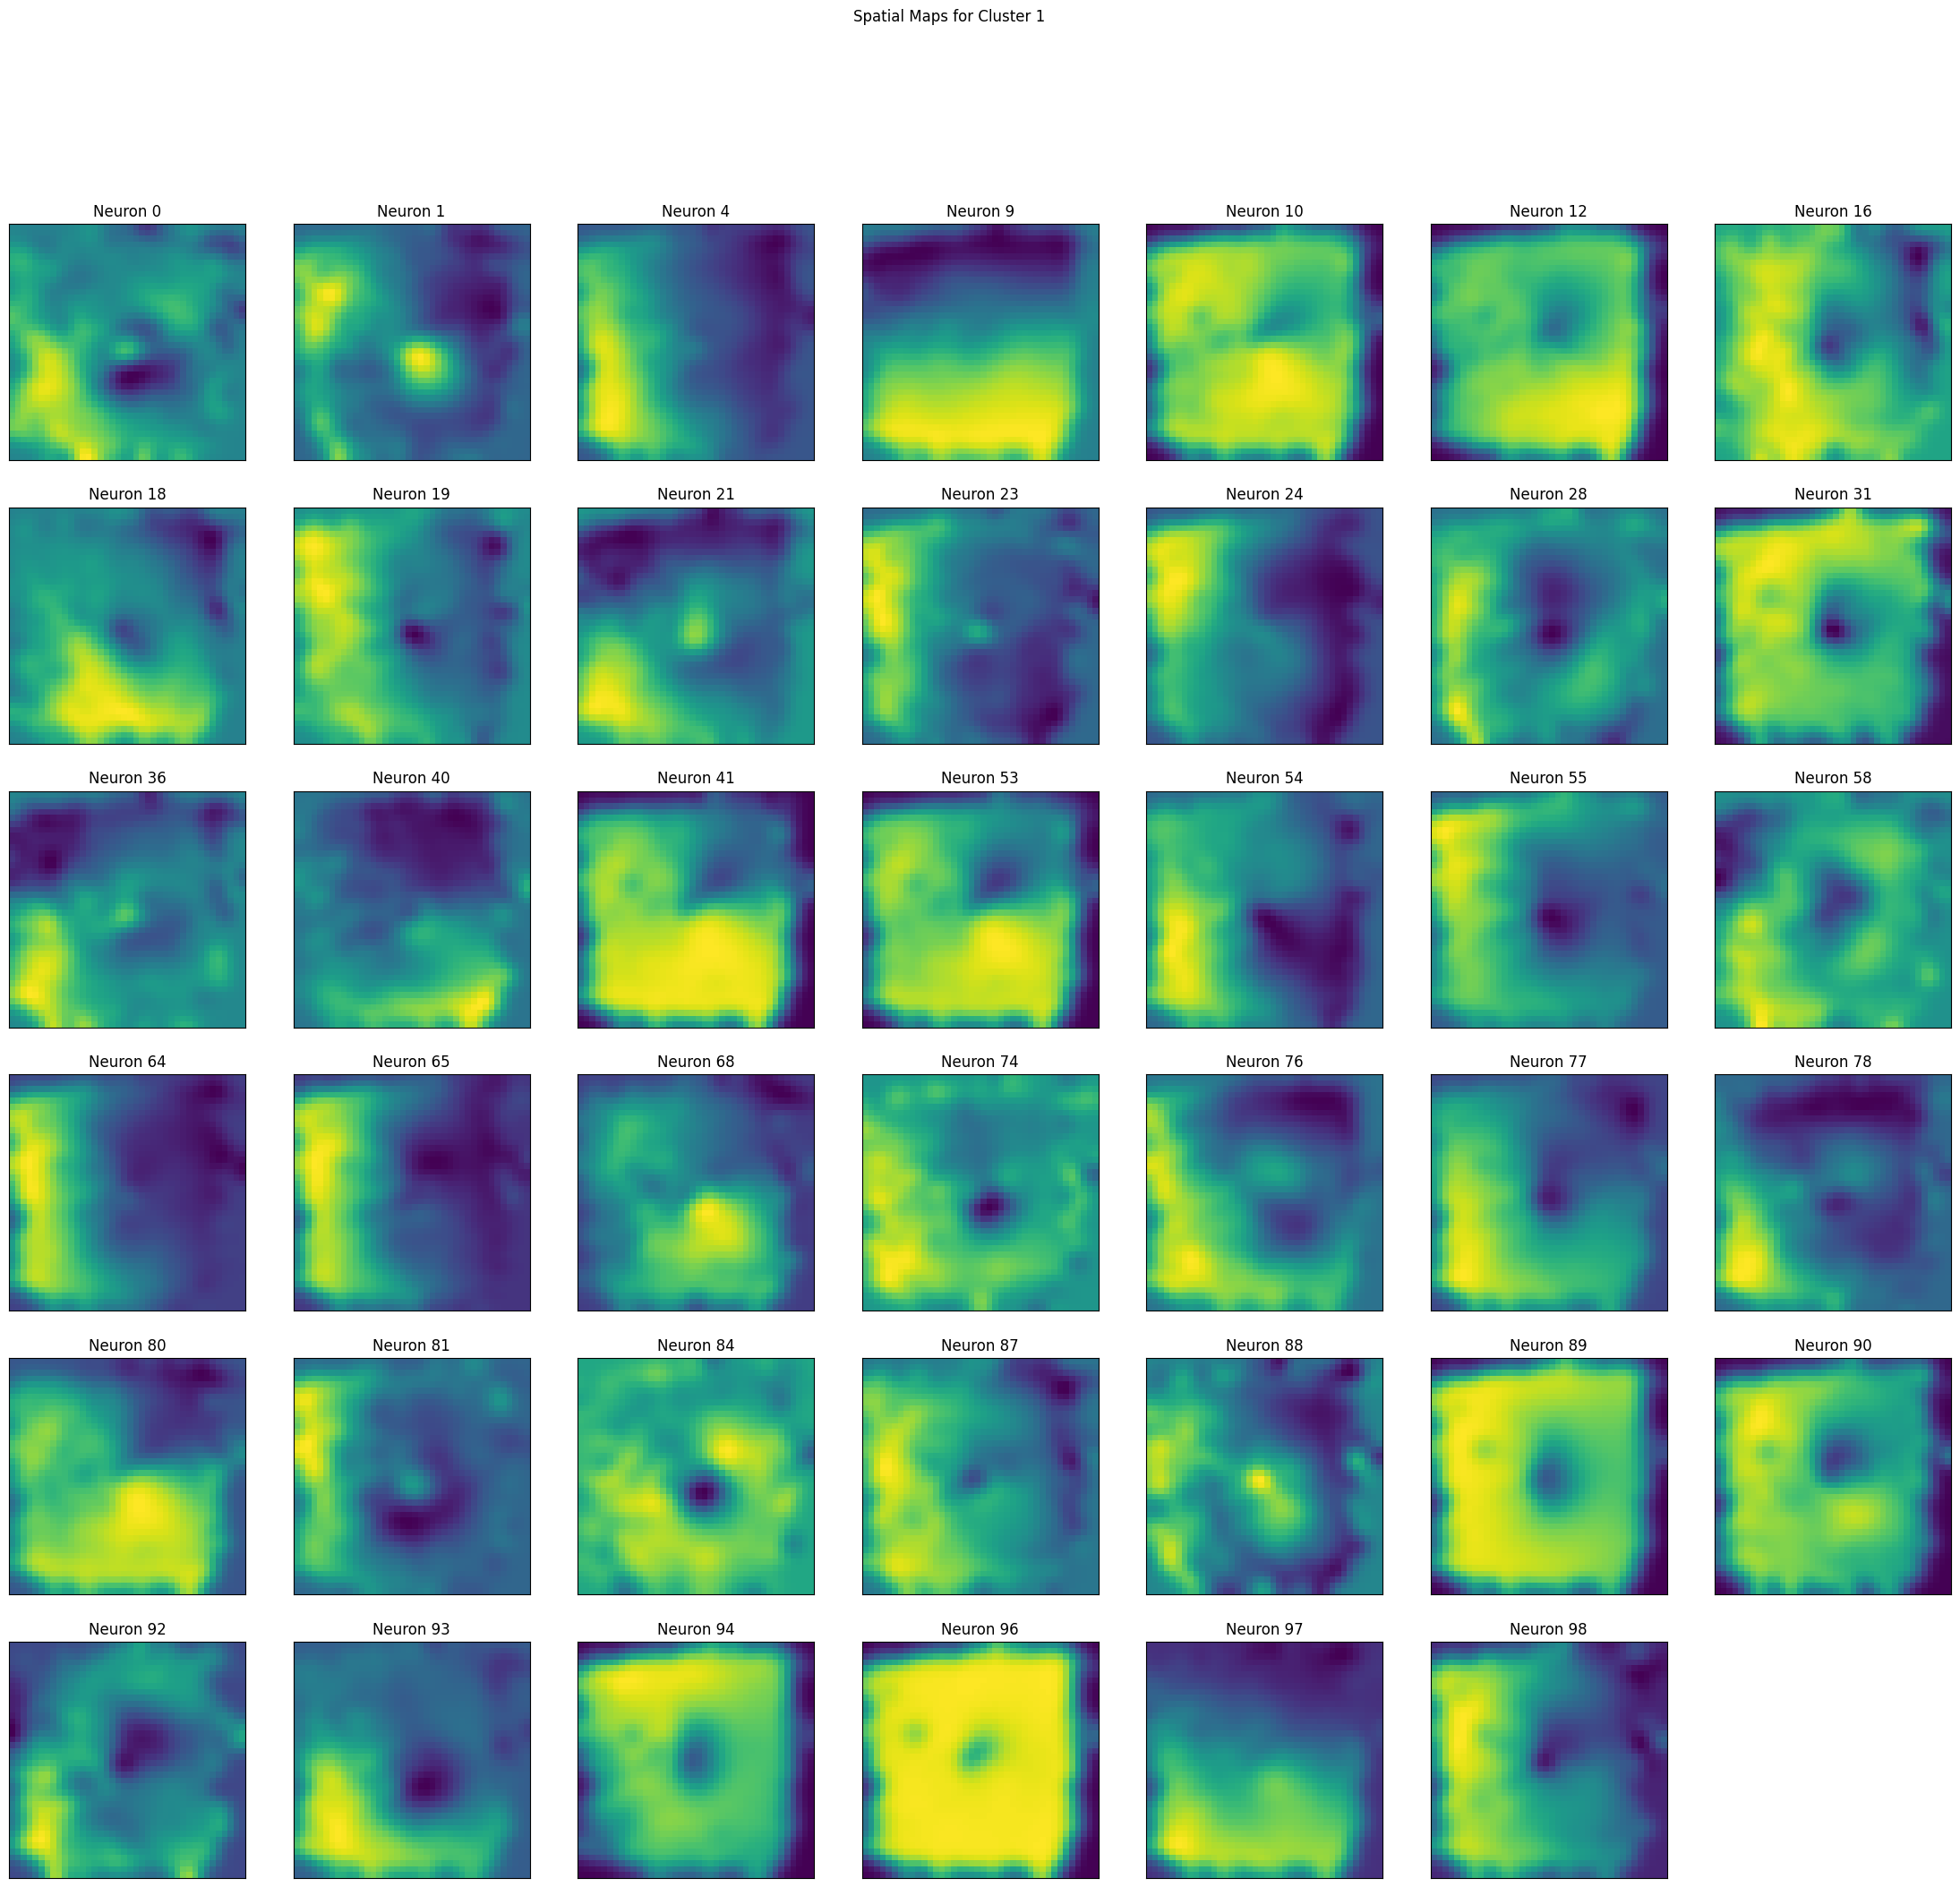

Cluster 2: [ 2  3  8 27 44 47 48 49 50 59 63 67 69 82 83 85 91]


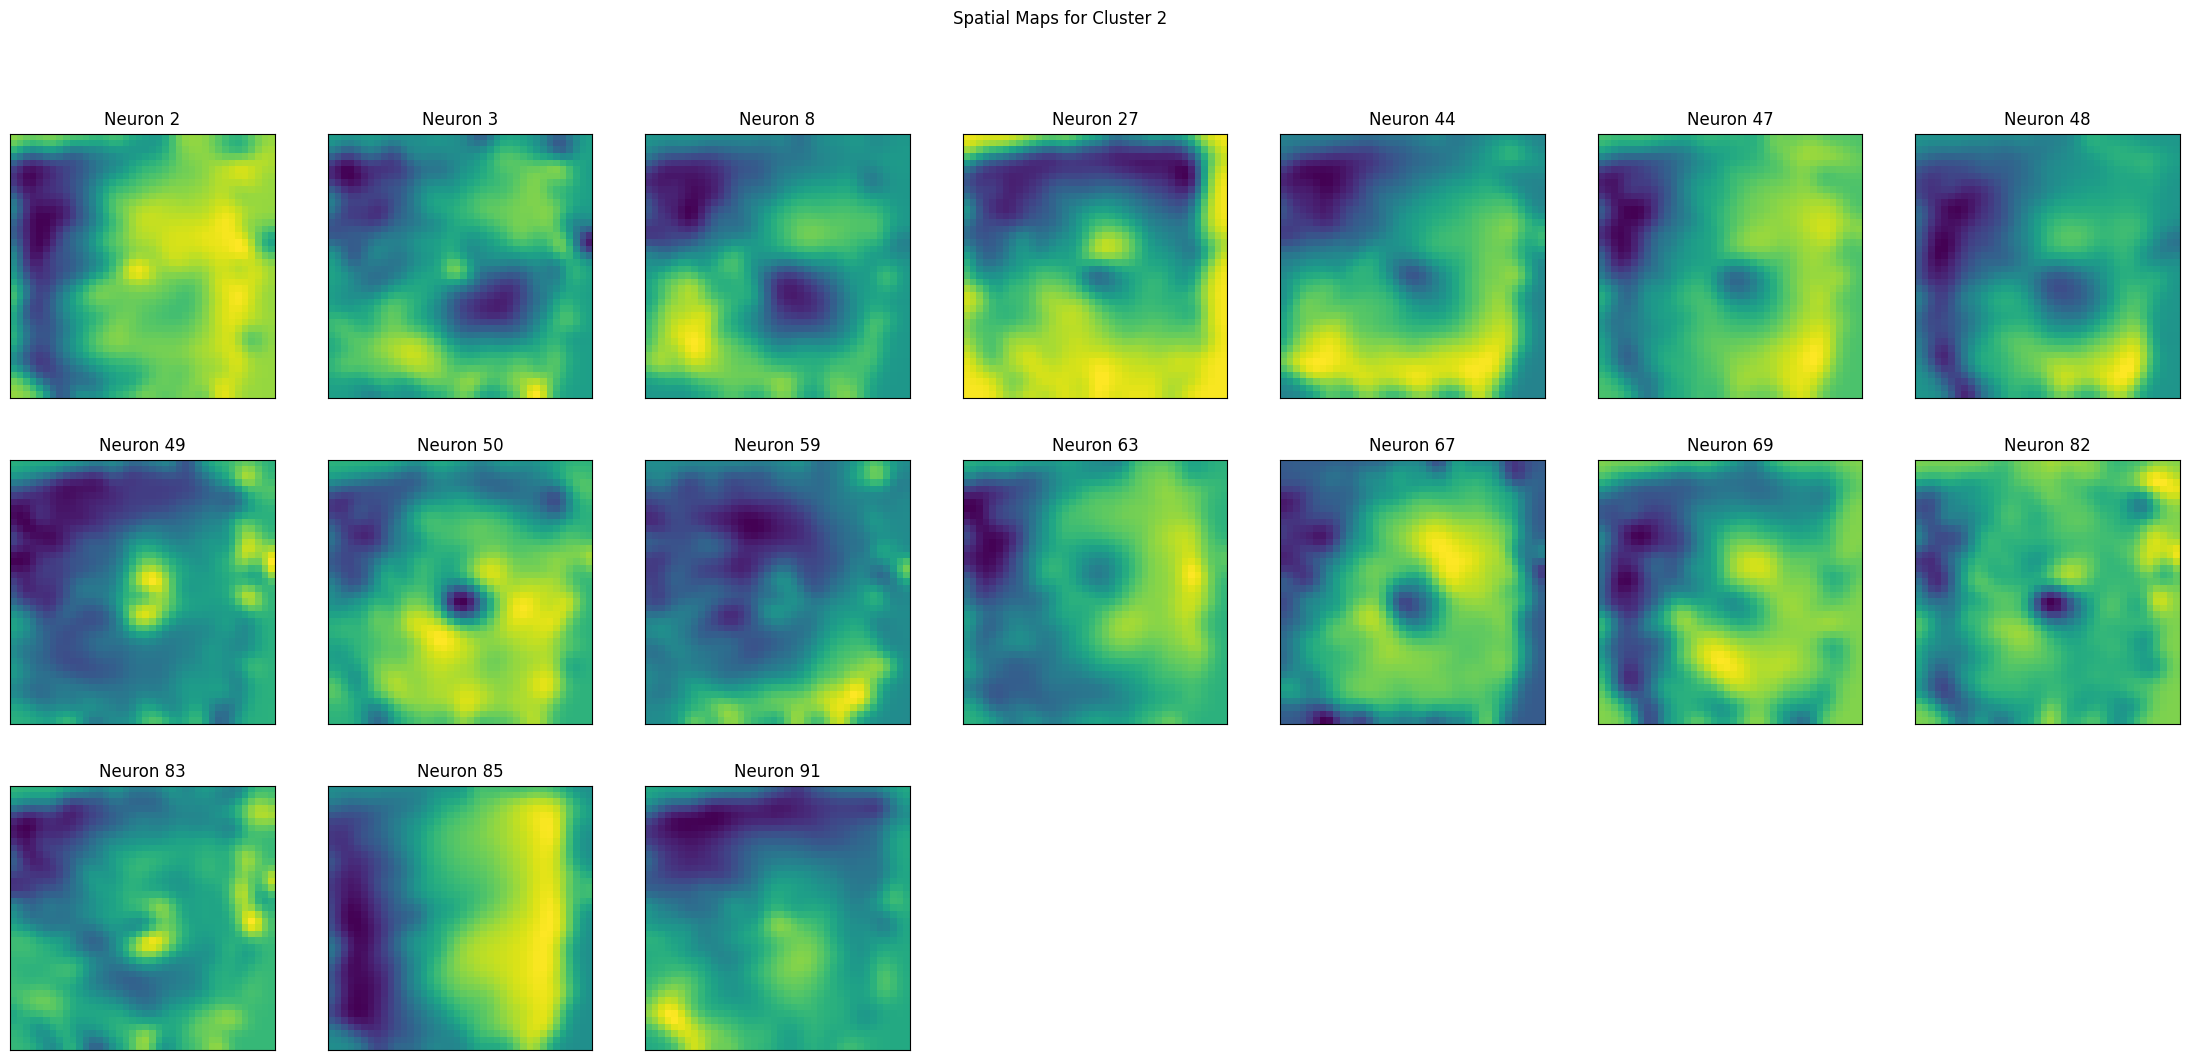

Cluster 3: [ 5  6 37 52 70 71]


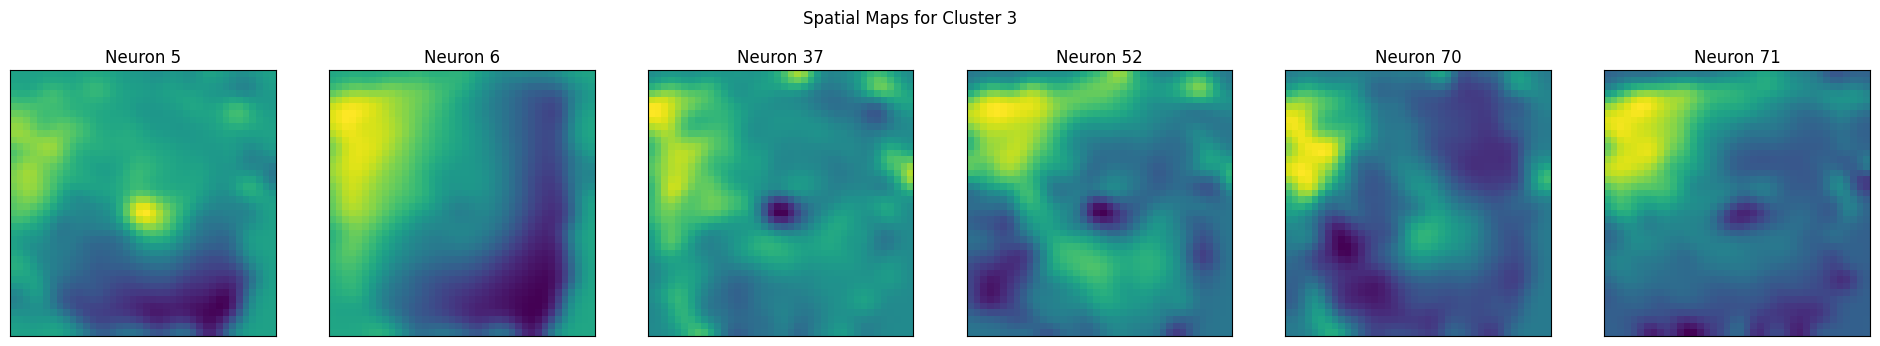

Cluster 4: [ 7 11 17 22 26 30 33 35 38 39 42 43 46 60 61 73 75 95]


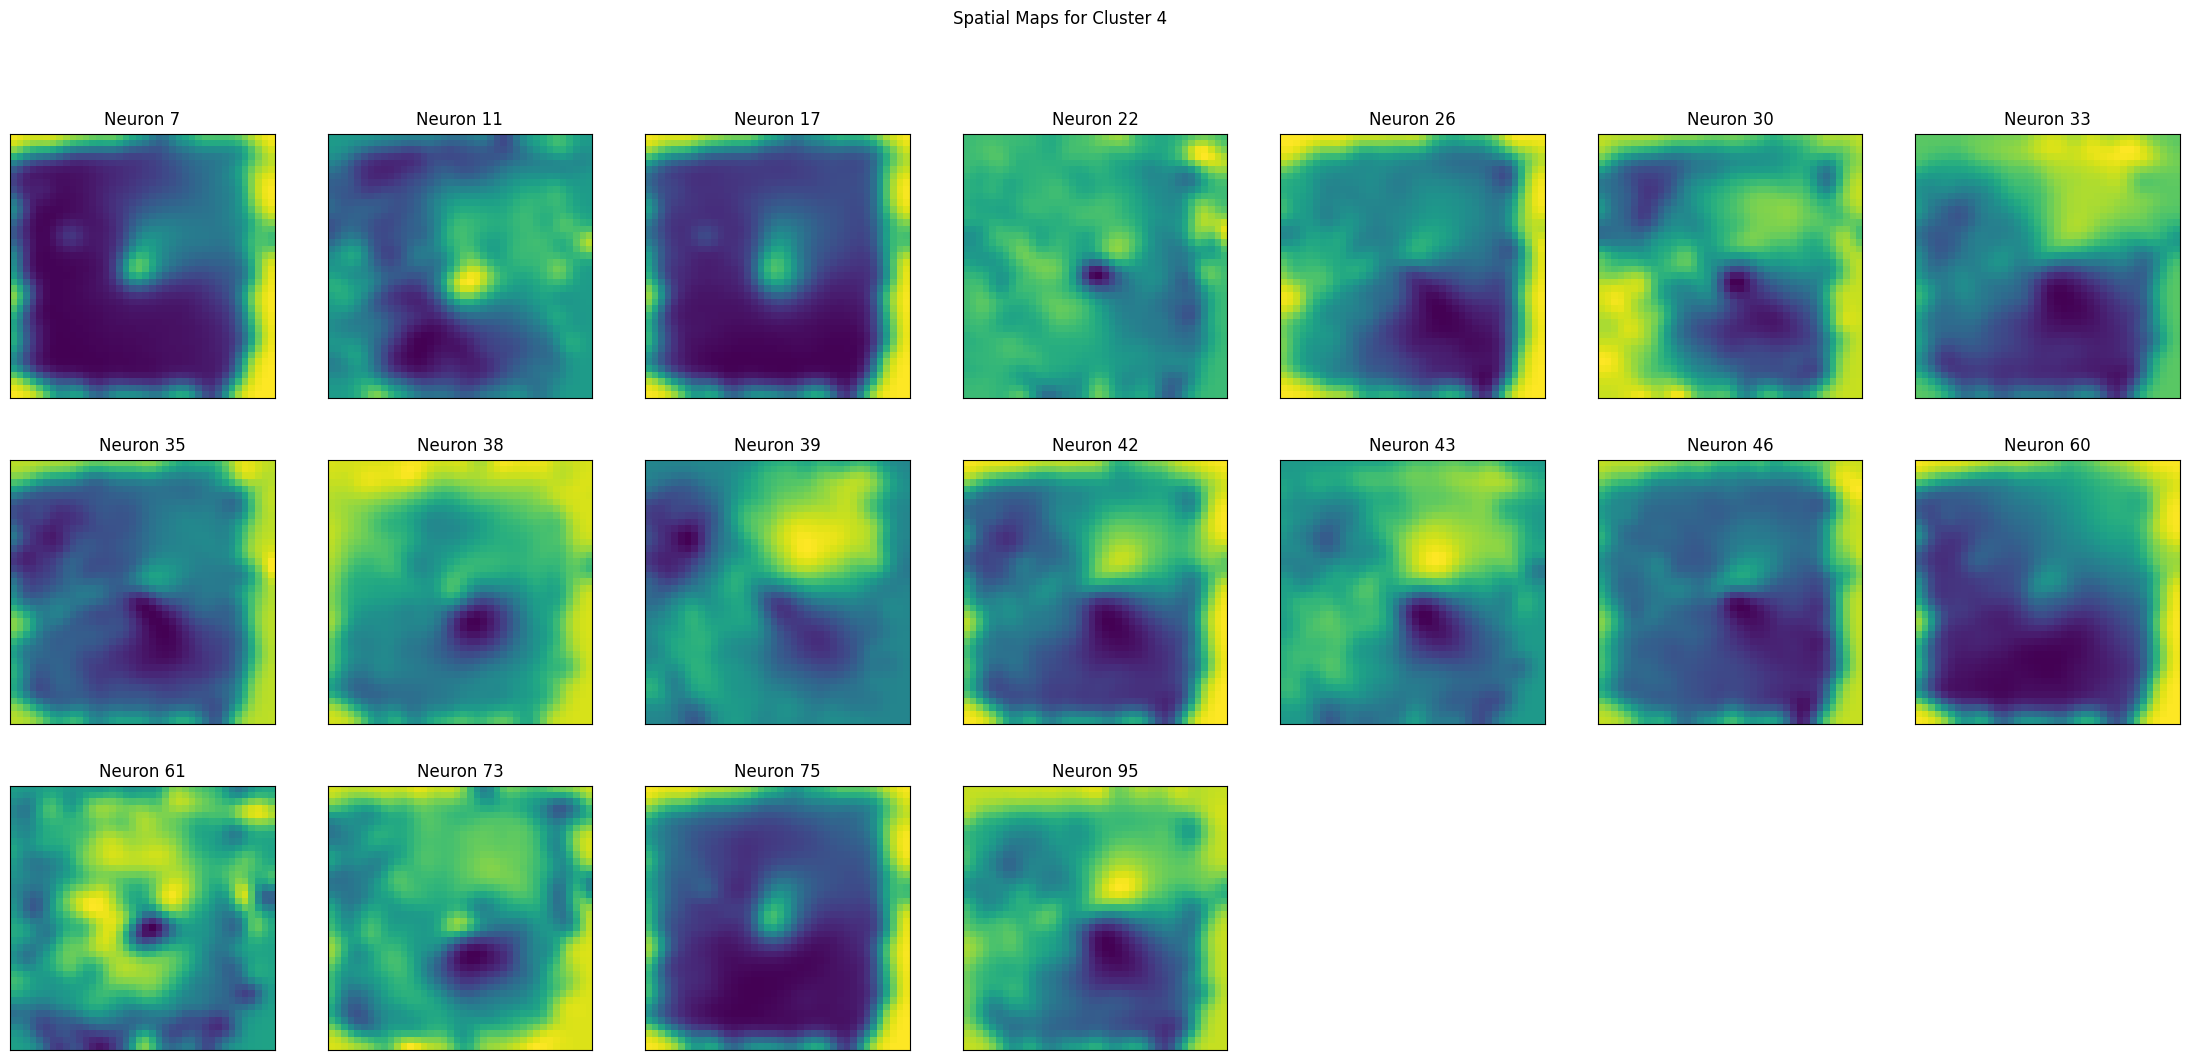

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from utils.plots import smart_subplots
maps = visualizer.get_spatial_maps(absolute=False)
cos_sims = visualizer.compute_cos_sim_on_maps(maps)

import seaborn as sns
import scipy.cluster.hierarchy as sch

linkage = sch.linkage(1 - cos_sims, method='ward')
sns.clustermap(cos_sims, row_linkage=linkage, col_linkage=linkage, cmap='coolwarm', center=0)

# cluster the resulting cells into 5 clusters
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')
labels = clustering.fit_predict(1 - cos_sims)
for cluster_id in range(num_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    print(f"Cluster {cluster_id}: {cluster_indices}")
    fig, axes = smart_subplots(len(cluster_indices), 7)
    axes = np.array(axes).ravel()
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    for i, neuron_idx in enumerate(cluster_indices):
        axes[i].imshow(maps[neuron_idx], cmap='viridis', origin='lower')
        axes[i].set_title(f'Neuron {neuron_idx}')
    plt.suptitle(f'Spatial Maps for Cluster {cluster_id}')
    plt.show()

100%|██████████| 100/100 [00:01<00:00, 63.76it/s]


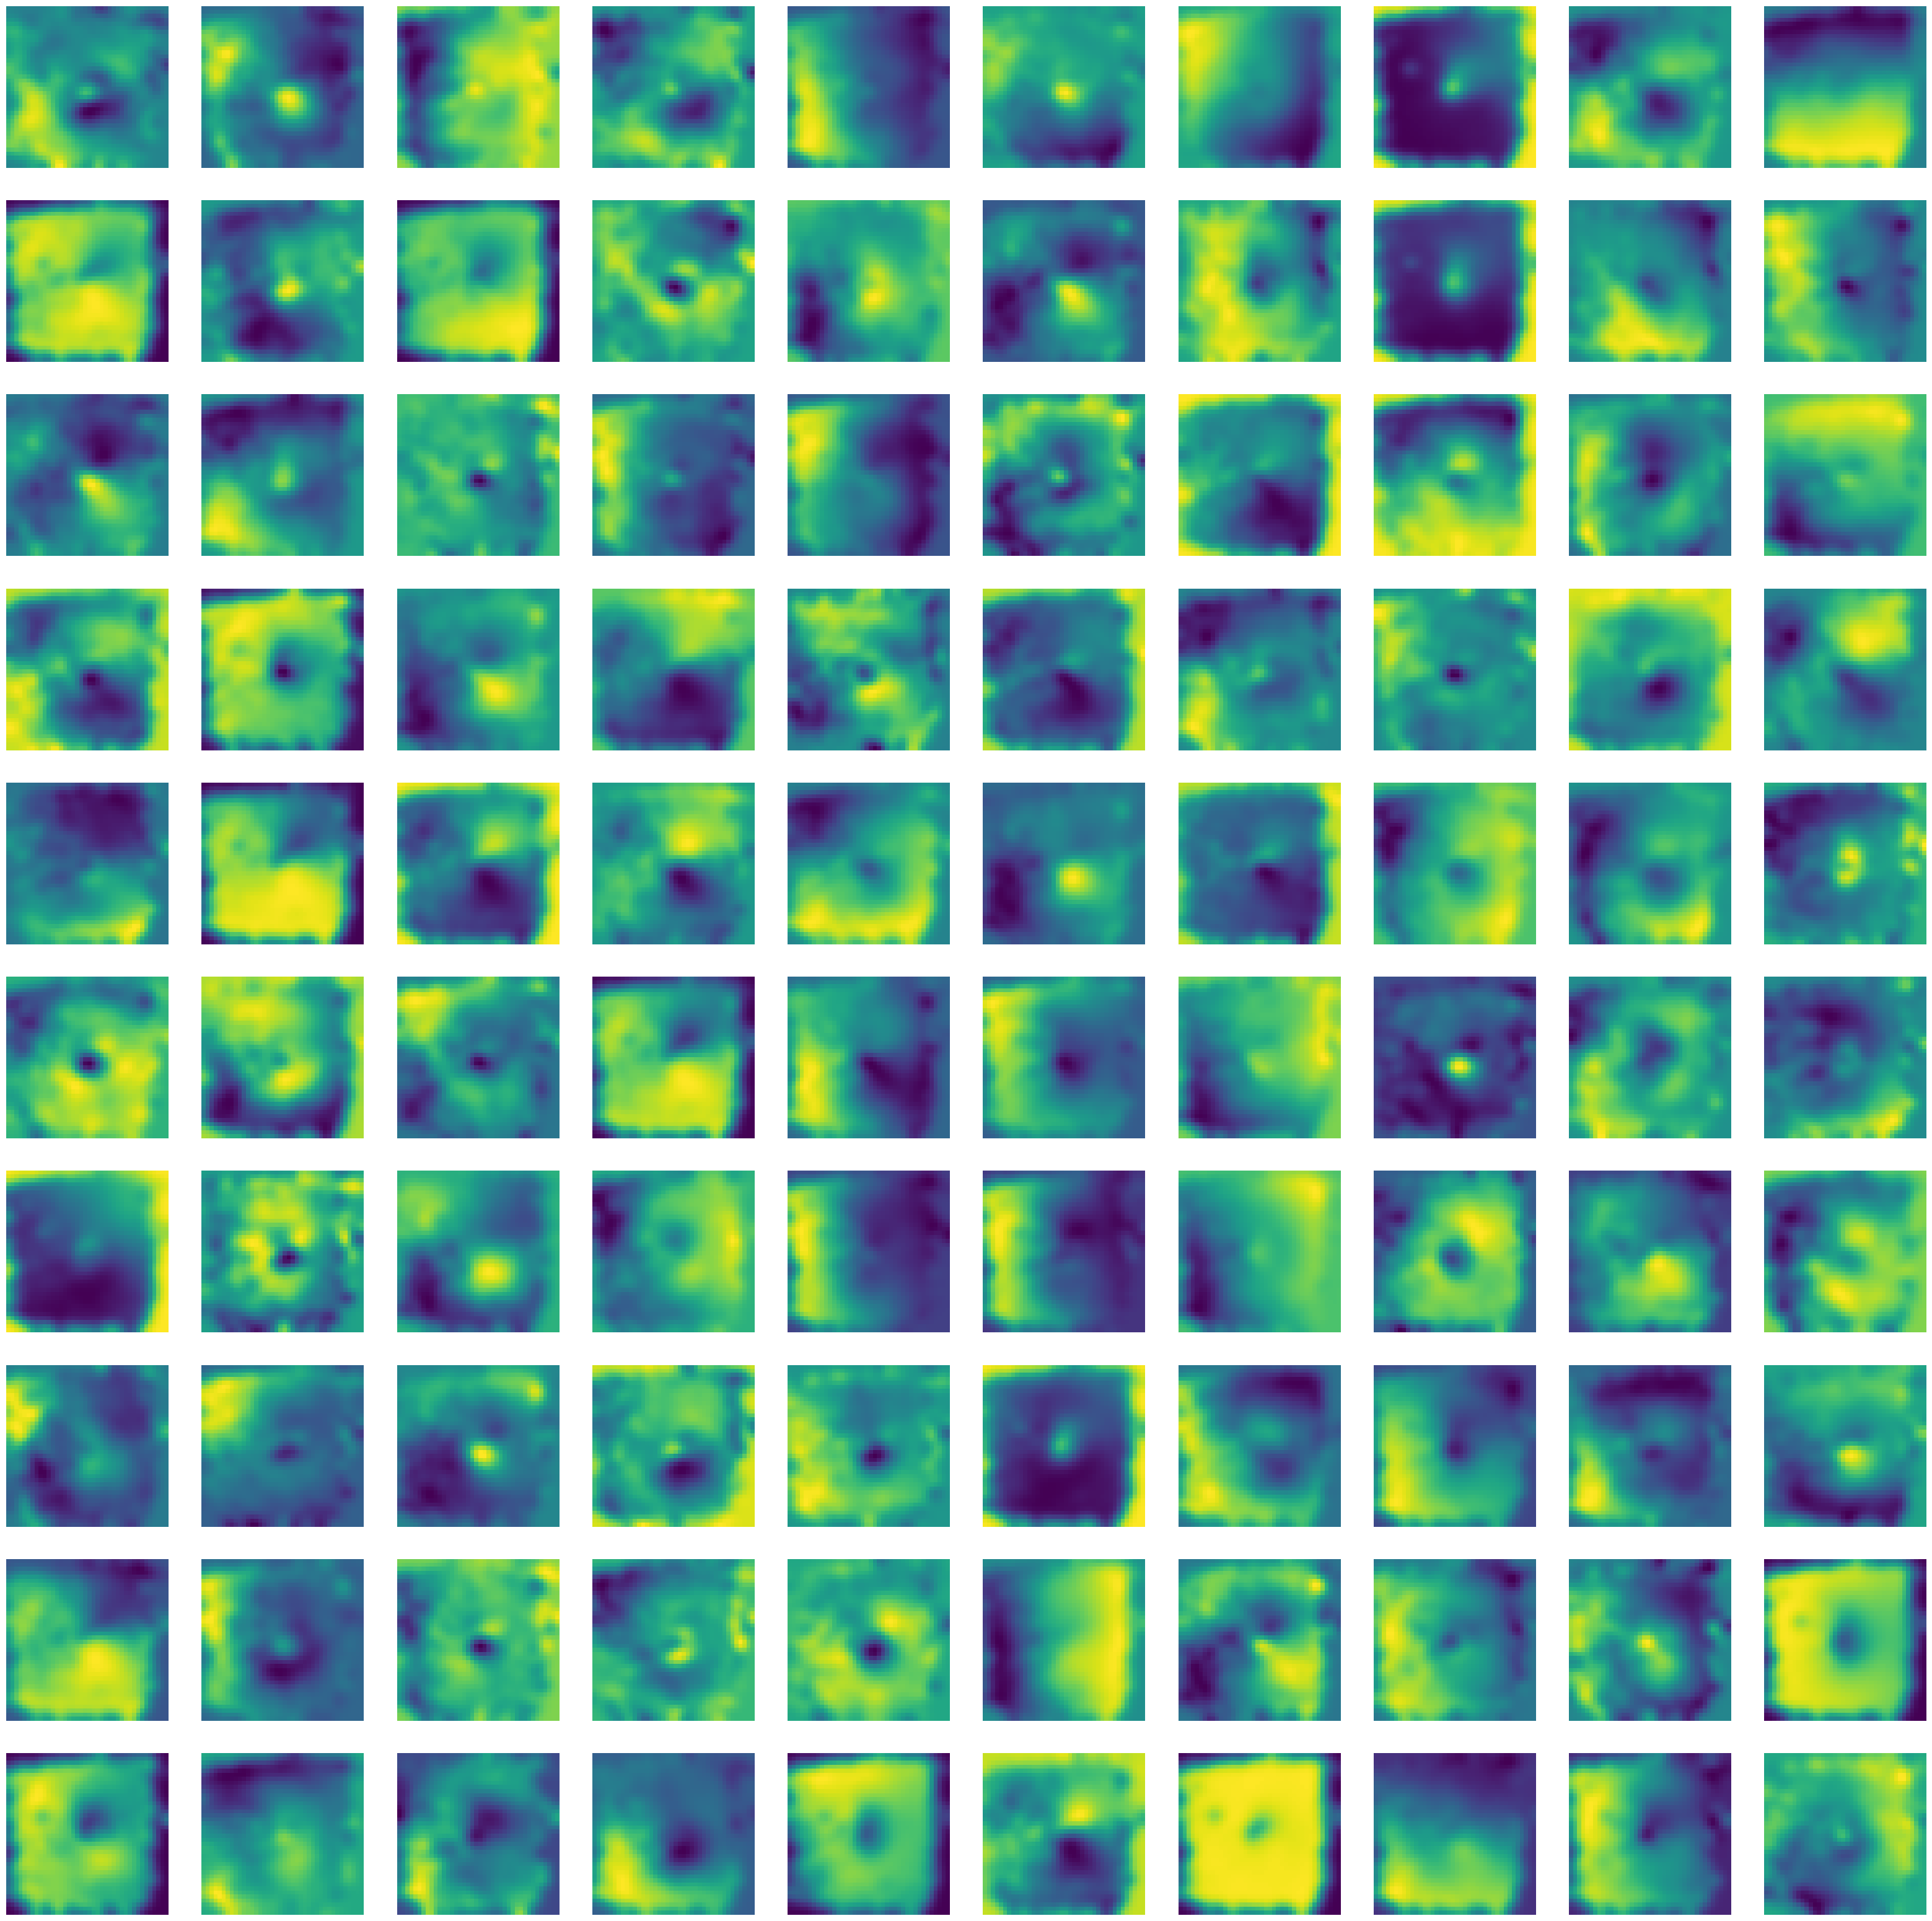

In [12]:
# plot all neurons in a grid
maps = visualizer.get_spatial_maps(absolute=False)
fig, axes = smart_subplots(100, 10)
for i, ax in enumerate(axes):
    if i < maps.shape[0]:
        ax.imshow(maps[i], cmap='viridis', origin='lower')
    ax.axis('off')
plt.show()